In [1]:
import numpy as np
import sep
# additional setup for reading the test image and displaying plots
#import fitsio
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [18., 15.]

In [2]:
# read image into standard 2-d numpy array
hdu = fits.open("../Galactic-PNe/NGC 3242_halpha.fits")
wcs = WCS(hdu[0].header)
hdu[0].data

array([[-1.3753302e-17,  6.3009855e-18,  2.1021215e-17, ...,
        -1.0675174e-17,  9.6605193e-19,  2.1707327e-17],
       [-1.8848662e-17,  5.4651074e-18,  3.5408158e-17, ...,
        -2.1447420e-18,  5.8540544e-18,  8.8989248e-18],
       [-1.7484583e-17,  1.9213503e-17,  5.1722671e-17, ...,
         1.4140621e-17,  1.4613734e-17,  1.7954771e-17],
       ...,
       [-1.8573973e-17, -1.6278029e-17,  5.1608307e-18, ...,
         4.6412612e-18, -1.5865220e-17, -2.4995461e-17],
       [-4.7867395e-18,  8.5329586e-18,  1.9866531e-17, ...,
         4.8343218e-18, -5.4889232e-18, -4.3563657e-18],
       [-2.4938648e-18,  4.2668052e-18,  7.4081138e-18, ...,
         1.9845256e-18,  1.4368652e-17,  2.4095095e-17]], dtype=float32)

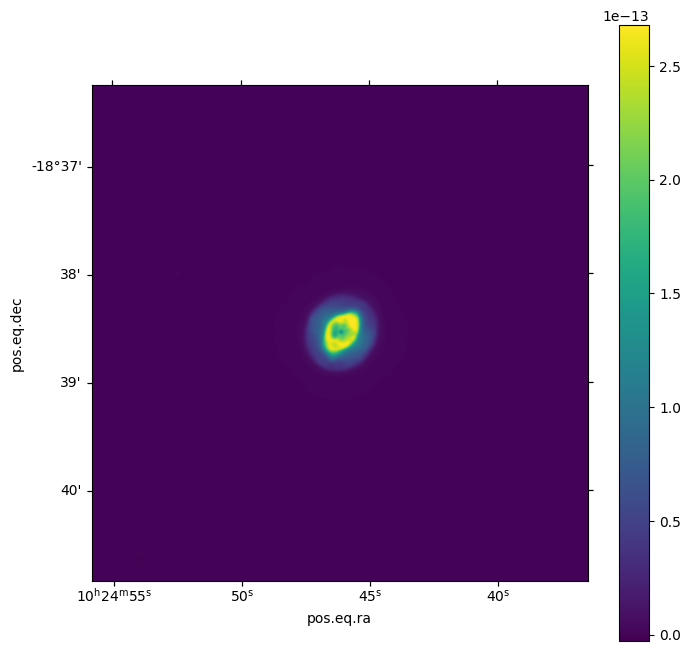

In [3]:
# show the image
m, s = np.mean(hdu[0].data), np.std(hdu[0].data)

plt.figure(figsize=(8, 8))
ax = plt.subplot(projection=wcs)
plt.imshow(hdu[0].data, origin='lower')
plt.colorbar();
#plt.savefig("difference_Ha.jpg")

## Try impove the contrast

In [4]:
data = hdu[0].data

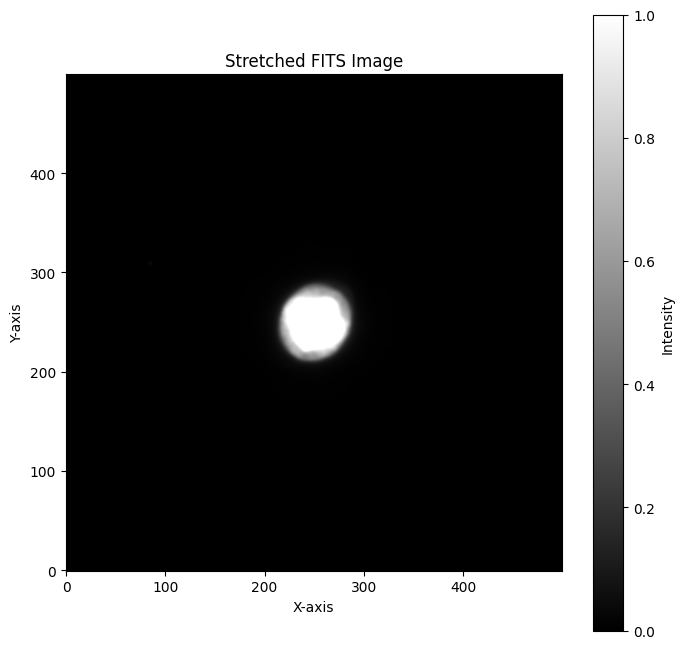

In [5]:

# Apply histogram stretching (linear stretch)
min_value = np.percentile(data, 1)
max_value = np.percentile(data, 99)
stretched_data = np.clip((data - min_value) / (max_value - min_value), 0, 1)

# Plot the stretched FITS image
plt.figure(figsize=(8, 8))
plt.imshow(stretched_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Stretched FITS Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


/tmp/ipykernel_3526642/2819072182.py:2: RuntimeWarning: invalid value encountered in log
  log_data = np.log(data)  # Adding 1 to avoid logarithm of zero


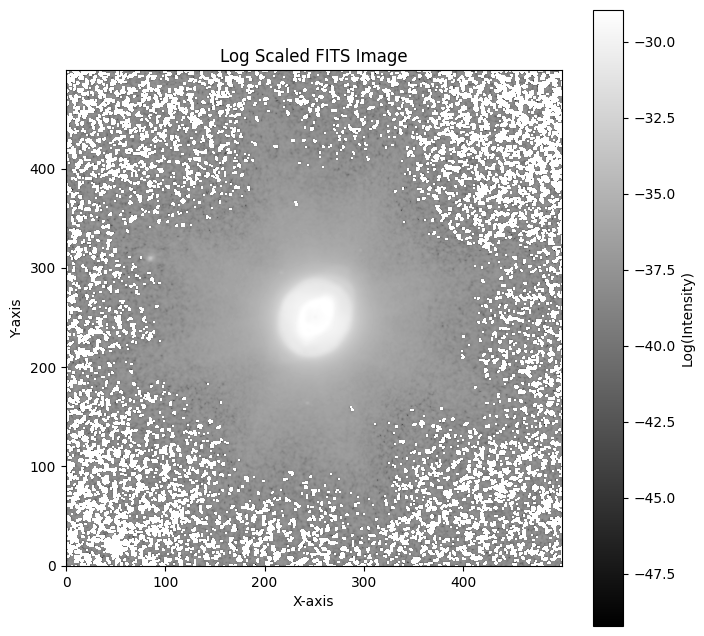

In [6]:
# Apply logarithmic scaling
log_data = np.log(data)  # Adding 1 to avoid logarithm of zero

# Plot the logarithmically scaled FITS image
plt.figure(figsize=(8, 8))
plt.imshow(log_data, cmap='gray', origin='lower')
plt.colorbar(label='Log(Intensity)')
plt.title('Log Scaled FITS Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


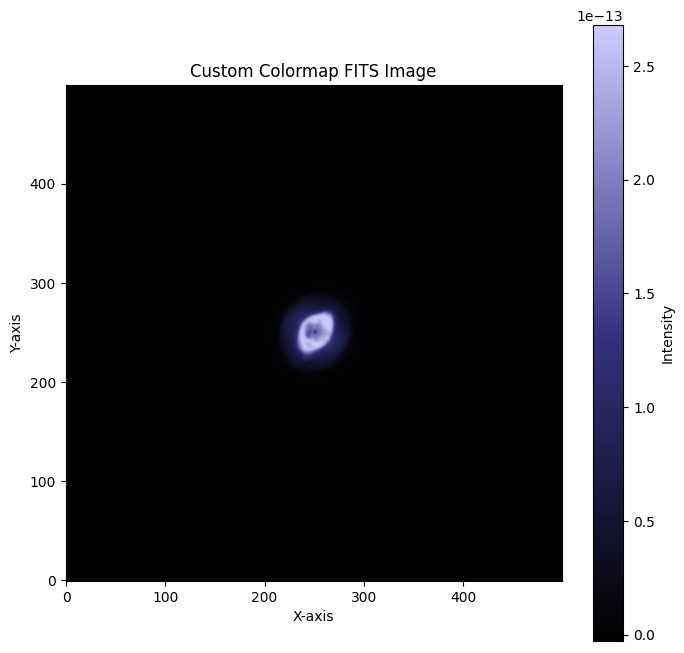

In [7]:
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap that emphasizes dim regions
colors = [(0, 0, 0), (0.2, 0.2, 0.5), (0.8, 0.8, 1)]  # Dark to light
custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)

# Plot the FITS image using the custom colormap
plt.figure(figsize=(8, 8))
plt.imshow(data, cmap=custom_cmap, origin='lower')
plt.colorbar(label='Intensity')
plt.title('Custom Colormap FITS Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


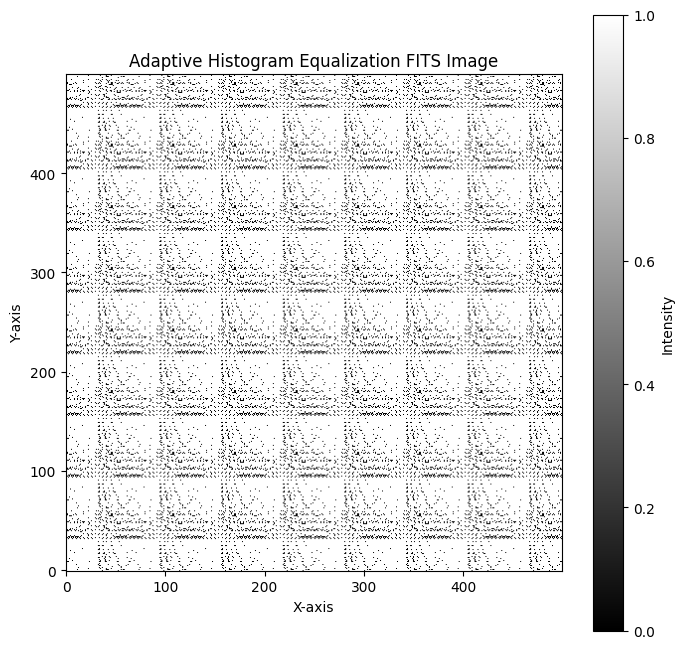

In [8]:
from skimage import exposure

# Apply CLAHE for adaptive histogram equalization
equalized_data = exposure.equalize_adapthist(data, clip_limit=100)

# Plot the equalized FITS image
plt.figure(figsize=(8, 8))
plt.imshow(equalized_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Adaptive Histogram Equalization FITS Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


/tmp/ipykernel_3526642/3283556682.py:4: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_data = denoise_wavelet(data, multichannel=False)


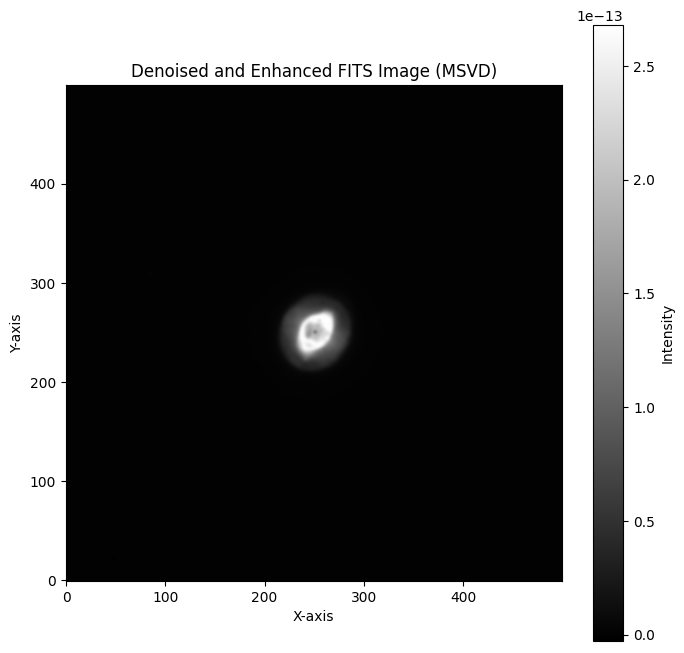

In [9]:
from skimage.restoration import denoise_wavelet

# Apply MSVD-based denoising and enhancement
denoised_data = denoise_wavelet(data, multichannel=False)

# Plot the denoised and enhanced FITS image
plt.figure(figsize=(8, 8))
plt.imshow(denoised_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Denoised and Enhanced FITS Image (MSVD)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


In [10]:
# Define your custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom", ["blue", "green", "yellow", "red"])

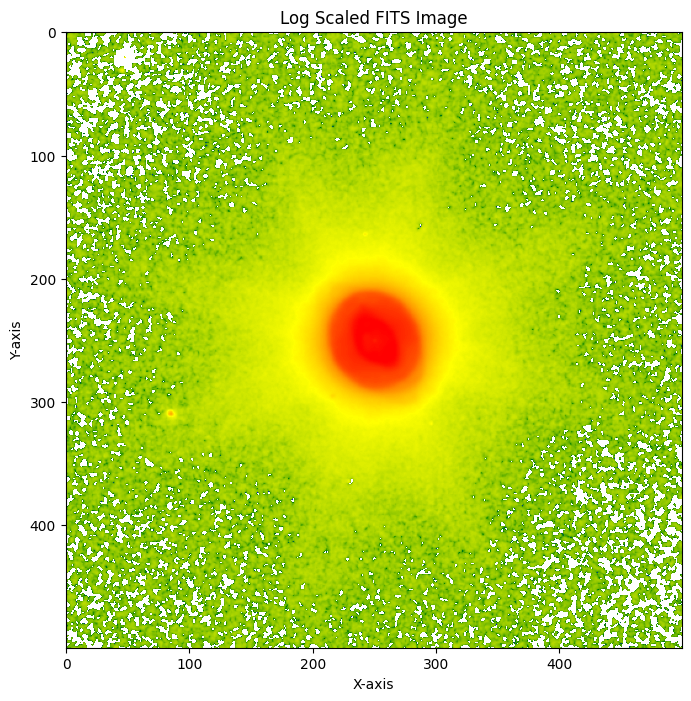

In [11]:
# Apply logarithmic scaling
#log_data = np.log(data_j660)  # Adding 1 to avoid logarithm of zero

# Plot the logarithmically scaled FITS image
plt.figure(figsize=(8, 8))
plt.imshow(hdu[0].data,  cmap=custom_cmap, norm=LogNorm())
# I chose the tick marks based on the histogram above
# I chose the tick marks based on the histogram above
#cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
#cbar.ax.set_yticklabels(['5,000','10,000','20,000'])
#plt.colorbar(label='Log(Intensity)')
plt.title('Log Scaled FITS Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
